In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ahdd1/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/csvTestLabel 10k x 1.csv
/kaggle/input/ahdd1/csvTrainLabel 60k x 1.csv
/kaggle/input/ahdd1/Train + Test Matlab.mat
/kaggle/input/ahdd1/csvTestImages 10k x 784.csv
/kaggle/input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

sns.set(style='white', context='notebook', palette='deep')

In [3]:
# Load the data
X_train = pd.read_csv('/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv')
Y_train = pd.read_csv('/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv')
X_test = pd.read_csv('/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv')
y_test = pd.read_csv('/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv')

In [4]:
X_train.shape


(59999, 784)

In [5]:
X_test.shape

(9999, 784)

Normalize the Data

In [6]:
X_train=X_train/255.0
X_test=X_test/255.0

Reshape the data

In [7]:
# Reshape image in 3D array (height = 28px, width = 28px , canal = 1)

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [8]:
X_test.shape

(9999, 28, 28, 1)

Encode labels (one hot encoding)


In [9]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)
y_test  = to_categorical(y_test , num_classes = 10)

In [10]:
Y_train.shape

(59999, 10)

Split data to training and validation


In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=4)


In [12]:
X_train.shape

(53999, 28, 28, 1)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


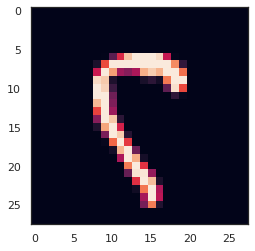

In [13]:
img_num=2022   #  Please try with this number to understand how augment you data 
               # 1111, 111 ,101 ,144 ,663

#image fixing

image = (X_train[img_num])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(Y_train[img_num])

CNN Model

In [14]:
#Creating CNN model

model = Sequential()

model.add(Conv2D(filters = 80, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 80)        2080      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 80)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        128064    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

2022-09-15 23:17:37.783070: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
# Define the optimizer
optimizer = SGD(learning_rate=0.001, momentum=0.30)

In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
history = model.fit( X_train,Y_train, batch_size=64, epochs = 30, validation_data = (X_val, Y_val), verbose = 1)


2022-09-15 23:17:38.435766: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
844/844 [==============================] - 95s 112ms/step - loss: 2.2374 - accuracy: 0.2559 - val_loss: 2.0818 - val_accuracy: 0.7037
Epoch 2/30
844/844 [==============================] - 94s 112ms/step - loss: 1.4228 - accuracy: 0.6485 - val_loss: 0.5600 - val_accuracy: 0.9007
Epoch 3/30
844/844 [==============================] - 94s 111ms/step - loss: 0.5225 - accuracy: 0.8557 - val_loss: 0.2545 - val_accuracy: 0.9415
Epoch 4/30
844/844 [==============================] - 95s 113ms/step - loss: 0.3379 - accuracy: 0.9064 - val_loss: 0.1852 - val_accuracy: 0.9527
Epoch 5/30
844/844 [==============================] - 96s 114ms/step - loss: 0.2680 - accuracy: 0.9242 - val_loss: 0.1582 - val_accuracy: 0.9587
Epoch 6/30
844/844 [==============================] - 95s 112ms/step - loss: 0.2304 - accuracy: 0.9332 - val_loss: 0.1326 - val_accuracy: 0.9652
Epoch 7/30
844/844 [==============================] - 96s 113ms/step - loss: 0.2030 - accuracy: 0.9420 - val_loss: 0.1223 - val_ac

In [18]:
# predict test results y_pred
y_pred = model.predict(X_test)

In [19]:
loss,accuracy=model.evaluate(X_test , y_test,verbose=3)
print('Accuracy--->',round(accuracy*100,2),'%')
print('Loss--->',round(loss*100,2),'%')

Accuracy---> 97.59 %
Loss---> 7.78 %
